In [131]:
import pandas as pd
import numpy as np
import random
from sklearn.datasets import load_digits,load_iris
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

In [132]:


iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(
    iris_df.drop('target', axis=1),
    iris_df['target'],
    test_size=0.2,
    random_state=42
)

rf_iris = RandomForestClassifier(random_state=42)
rf_iris.fit(X_train_iris, y_train_iris)
y_pred_iris = rf_iris.predict(X_test_iris)
print('Точность для набора данных iris:', accuracy_score(y_test_iris, y_pred_iris))
print('Матрица ошибок для набора данных iris:\n', confusion_matrix(y_test_iris, y_pred_iris))
print('Отчёт о классификации для набора данных iris:\n', classification_report(y_test_iris, y_pred_iris))


Точность для набора данных iris: 1.0
Матрица ошибок для набора данных iris:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Отчёт о классификации для набора данных iris:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [133]:
load_digits_data = load_digits()
load_digits_df = pd.DataFrame(load_digits_data.data, columns=load_digits_data.feature_names)
load_digits_df['target'] = load_digits_data.target

X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(
    load_digits_df.drop('target', axis=1),
    load_digits_df['target'],
    test_size=0.2,
    random_state=42
)

rf_bc = RandomForestClassifier(random_state=42)
rf_bc.fit(X_train_bc, y_train_bc)
y_pred_bc = rf_bc.predict(X_test_bc)

print('Точность для набора данных load digits:', accuracy_score(y_test_bc, y_pred_bc))
print('Матрица ошибок для набора данных load digits:\n', confusion_matrix(y_test_bc, y_pred_bc))
print('Отчёт о классификации для набора данных load digits:\n', classification_report(y_test_bc, y_pred_bc))

cv_scores = cross_val_score(rf_bc, load_digits_df.drop('target', axis=1), load_digits_df['target'], cv=5)
print('Оценки перекрёстной проверки для набора данных load digits:', cv_scores)

param_grid = {'n_estimators': [10, 50, 100, 200], 'max_depth': [None, 2, 4, 6, 8], 'min_samples_split': [2, 4, 6, 8]}
grid_search = GridSearchCV(rf_bc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_bc, y_train_bc)

print('Лучшие параметры для набора данных load digits:', grid_search.best_params_)
print('Лучший показатель для набора данных load digits:', grid_search.best_score_)


rf_bc_opt = RandomForestClassifier(
    n_estimators=grid_search.best_params_['n_estimators'],
    max_depth=grid_search.best_params_['max_depth'],
    min_samples_split=grid_search.best_params_['min_samples_split'],
    random_state=42
)
rf_bc_opt.fit(X_train_bc, y_train_bc)
y_pred_bc_opt = rf_bc_opt.predict(X_test_bc)

print('Точность для набора данных load digits (оптимизированная):', accuracy_score(y_test_bc, y_pred_bc_opt))
print('Матрица ошибок для набора данных load digits (оптимизированная):\n', confusion_matrix(y_test_bc, y_pred_bc_opt))
print('Отчёт о классификации для набора данных load digits (оптимизированная):\n', classification_report(y_test_bc, y_pred_bc_opt))

Точность для набора данных load digits: 0.9722222222222222
Матрица ошибок для набора данных load digits:
 [[32  0  0  0  1  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 32  0  1  0  0  1  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 45  1  0  0  1]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  1  0  0  0  0  0  0 29  0]
 [ 0  0  0  0  0  1  0  1  0 38]]
Отчёт о классификации для набора данных load digits:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       1.00      0.94      0.97        34
           4       0.98      1.00      0.99        46
           5       0.94      0.96      0.95        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       0.9

In [134]:
salary_list = [30300, 55000, 67000, 89000, 100000, 230000]
city_list = ['Бишкек', 'Талас', 'Нарын', 'Астана', 'Алмата', 'Балыкчы']
age_list = list(range(30, 66))
vacation_prefer_list = ['Путешествия', 'Океанские каникулы', 'Сноубординг', 'Треккинг', 'Театральные постановки', 'Релаксация']
transport_prefer_list = ['автомобиль', 'самолёт', 'поезд', 'автобус', 'Лайнер']
target_list = ['Барселона', 'Рим', 'Кейптаун', 'Сидней', 'Киото', 'Бали']

data = []
for i in range(1000):
    data.append([
        random.choice(salary_list),
        random.choice(city_list),
        random.choice(age_list),
        random.choice(vacation_prefer_list),
        random.choice(transport_prefer_list),
        random.choice(target_list)
    ])

vacation_df = pd.DataFrame(data, columns=['salary', 'city', 'age', 'vacation_prefer', 'transport_prefer', 'target'])
vacation_df.head()


,salary,city,age,vacation_prefer,transport_prefer,target
0,89000,Нарын,49,Театральные постановки,автобус,Рим
1,230000,Нарын,57,Океанские каникулы,Лайнер,Сидней
2,30300,Талас,65,Театральные постановки,автобус,Сидней
3,100000,Балыкчы,48,Треккинг,Лайнер,Сидней
4,89000,Астана,37,Театральные постановки,автобус,Киото


In [135]:
vacation_df.dtypes
vacation_df['salary'] = vacation_df['salary'].astype(float)
vacation_df.head()

,salary,city,age,vacation_prefer,transport_prefer,target
0,89000.0,Нарын,49,Театральные постановки,автобус,Рим
1,230000.0,Нарын,57,Океанские каникулы,Лайнер,Сидней
2,30300.0,Талас,65,Театральные постановки,автобус,Сидней
3,100000.0,Балыкчы,48,Треккинг,Лайнер,Сидней
4,89000.0,Астана,37,Театральные постановки,автобус,Киото


In [136]:
vacation_df = pd.get_dummies(vacation_df, columns=['city', 'vacation_prefer', 'transport_prefer'])
vacation_df.head()

,salary,age,target,city_Алмата,city_Астана,city_Балыкчы,city_Бишкек,city_Нарын,city_Талас,vacation_prefer_Океанские каникулы,vacation_prefer_Путешествия,vacation_prefer_Релаксация,vacation_prefer_Сноубординг,vacation_prefer_Театральные постановки,vacation_prefer_Треккинг,transport_prefer_Лайнер,transport_prefer_автобус,transport_prefer_автомобиль,transport_prefer_поезд,transport_prefer_самолёт
0,89000.0,49,Рим,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False
1,230000.0,57,Сидней,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False
2,30300.0,65,Сидней,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False
3,100000.0,48,Сидней,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False
4,89000.0,37,Киото,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False


In [137]:
X = vacation_df.drop('target', axis=1)
y = vacation_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [146]:
modelF = RandomForestClassifier(random_state=42)
modelF.fit(X_train, y_train)

y_pred = modelF.predict(X_test)



accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.19


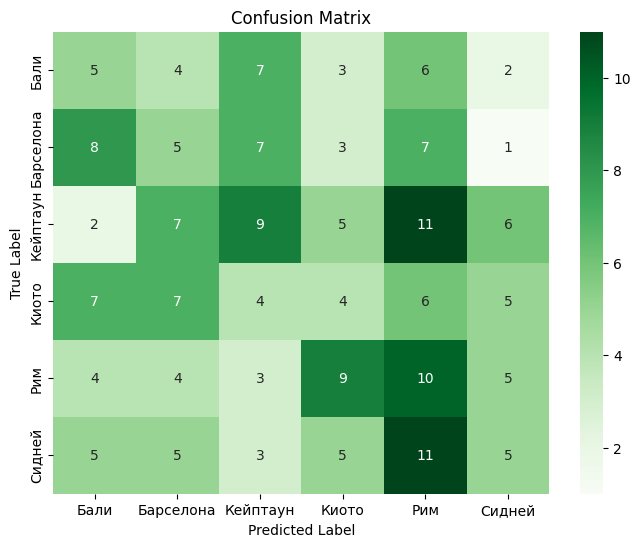

In [150]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=modelF.classes_, yticklabels=modelF.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [139]:
random_data = {
    'salary': [np.random.randint(30000, 200000)],
    'city': [np.random.choice(['Бишкек', 'Талас', 'Нарын', 'Астана', 'Алмата', 'Балыкчы'])],
    'age': [np.random.randint(30, 65)],
    'vacation_prefer': [np.random.choice(['Путешествия', 'Океанские каникулы', 'Сноубординг', 'Треккинг', 'Театральные постановки', 'Релаксация'])],
    'transport_prefer': [np.random.choice(['автомобиль', 'самолёт', 'поезд', 'автобус', 'Лайнер'])]
}

random_df = pd.DataFrame(random_data)
print(random_df)
random_df_encoded = pd.get_dummies(random_df, columns=['city', 'vacation_prefer', 'transport_prefer'], drop_first=True)

trained_features = X_train.columns

random_df_encoded = random_df_encoded.reindex(columns=trained_features, fill_value=0)

prediction = modelF.predict(random_df_encoded)

print(f'Predicted Destination: {prediction[0]}')

   salary    city  age         vacation_prefer transport_prefer
0  106024  Бишкек   30  Театральные постановки            поезд
Predicted Destination: Киото


In [140]:
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],  # Использовать логарифмическую шкалу
    'max_depth': [3, 5, 7]
}
model = RandomForestClassifier(random_state=42,class_weight="balanced")
grid_search_gb = GridSearchCV(model, param_grid, cv=5)
grid_search_gb.fit(X_train, y_train)

best_model_gb = grid_search_gb.best_estimator_
best_params_gb = grid_search_gb.best_params_

best_model_gb.fit(X_train, y_train)

y_pred_gb = best_model_gb.predict(X_test)
best_accuracy = best_model_gb.score(X_test, y_test)
print(f'Best Model Accuracy: {best_accuracy:.2f}')
print(f'Best Parameters: {best_params_gb}')

print("Отчет о классификации:")
print(classification_report(y_test, y_pred_gb))

Best Model Accuracy: 0.20
Best Parameters: {'max_depth': 8, 'min_samples_split': 8, 'n_estimators': 100}
Отчет о классификации:
              precision    recall  f1-score   support

        Бали       0.18      0.26      0.22        27
   Барселона       0.15      0.10      0.12        31
    Кейптаун       0.12      0.07      0.09        40
       Киото       0.29      0.15      0.20        33
         Рим       0.22      0.46      0.30        35
      Сидней       0.19      0.15      0.17        34

    accuracy                           0.20       200
   macro avg       0.19      0.20      0.18       200
weighted avg       0.19      0.20      0.18       200



## Вывод из работы

#### В ходе проведения лабораторной работы я ознакомился с основными концепциями оценки качества моделей машинного обучения, используя набор данных iris в качестве примера. Я применил различные методы улучшения и оценки моделей, такие как перекрестная проверка и решётчатый поиск, на наборе данных digits.В процессе моей работы я создал модель для определения предпочтений места отпуска на основе различных параметров. Я использовал данные о зарплате, городе проживания, возрасте, предпочтениях отпуска и транспорта, чтобы предсказать, где люди бы предпочли провести свой отпуск.Сперва я получил точность 19% ,после обучения модели и её оптимизации,а также изменения параметров я получил точность предсказаний на уровне 20%.Также я заметил,что при каждом запуске , в зависимости от dataset , меняется точность.Для этой цели мы создали собственный набор данных.